# Load in Libraries & Data

In [ ]:
pip install shap

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from numpy.random import randint
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import io
from google.colab import files
from google.colab import drive

from sklearn.inspection import permutation_importance
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
from collections import defaultdict
import shap

from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
import joblib

In [ ]:
# code for loading in
y = pd.read_excel('y.xlsx')
# X_clin = pd.read_excel('X_clin.xlsx')
# X_ling = pd.read_excel('X_ling.xlsx')
# X_nets_all = pd.read_excel('X_nets_all.xlsx')
# X_nets_sel = pd.read_excel('X_nets_sel.xlsx')
X_clin_ling = pd.read_excel('X_clin_ling.xlsx')
# X_clin_nets_sel = pd.read_excel('X_clin_nets_sel.xlsx')
# X_ling_nets_sel = pd.read_excel('X_ling_nets_sel.xlsx')
# X_all3_sel = pd.read_excel('X_all3_sel.xlsx')
X_all3 = pd.read_excel('X_all3.xlsx')


In [ ]:
# Also load models
best_rf_clin_ling = joblib.load('best_rf_clin_ling_2.pkl')
best_rf_all3 = joblib.load('best_rf_all3.pkl')


# Run SHAP & save as needed

In [ ]:
# Step 1: Initialize TreeSHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(best_rf_all3)
shap_values = explainer.shap_values(X_all3) # use X instead, takes longer but better for final


# Test for clin_ling model

In [ ]:
# for clin_ling model and data
rf2_explainer = shap.Explainer(best_rf_clin_ling.predict, X_clin_ling)
rf2_shap_values = rf2_explainer(X_clin_ling)

PermutationExplainer explainer: 4621it [12:56,  5.90it/s]


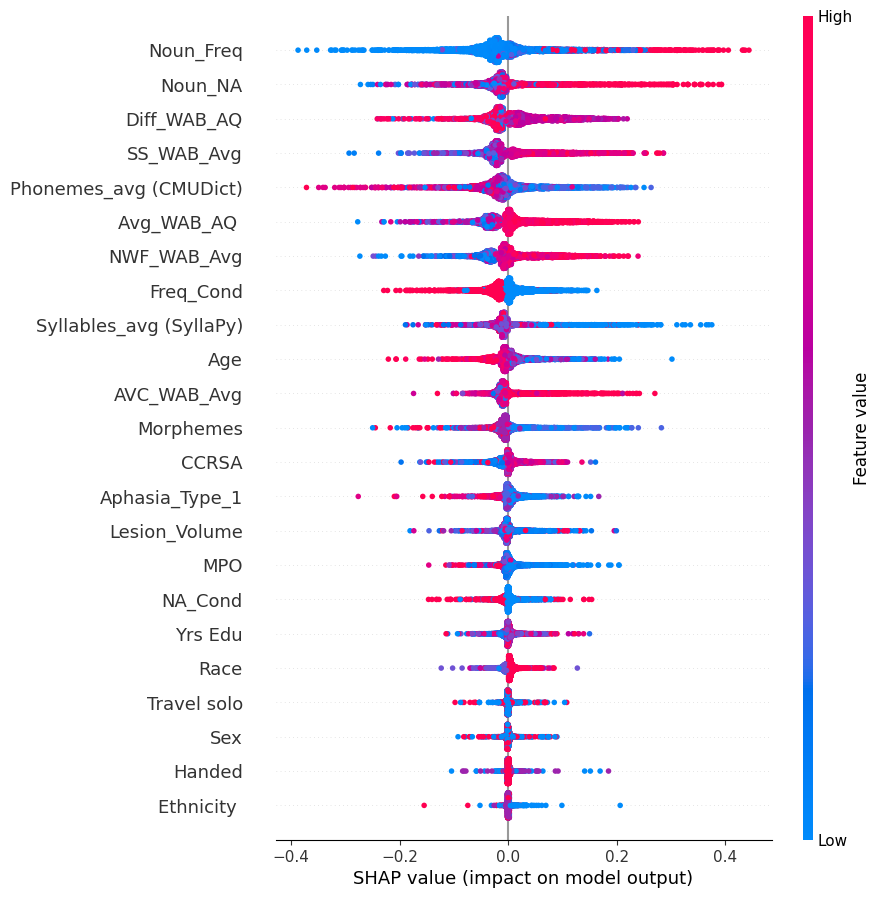

In [ ]:
shap.plots.beeswarm(rf2_shap_values, max_display=25)
# note natural cutoff happened at 15, this is forcing full display

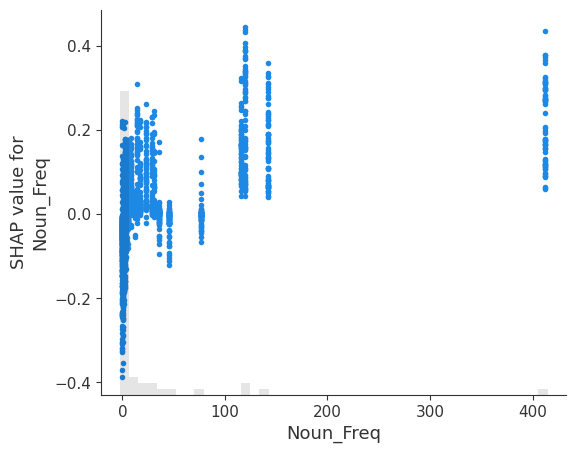

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Noun_Freq"])

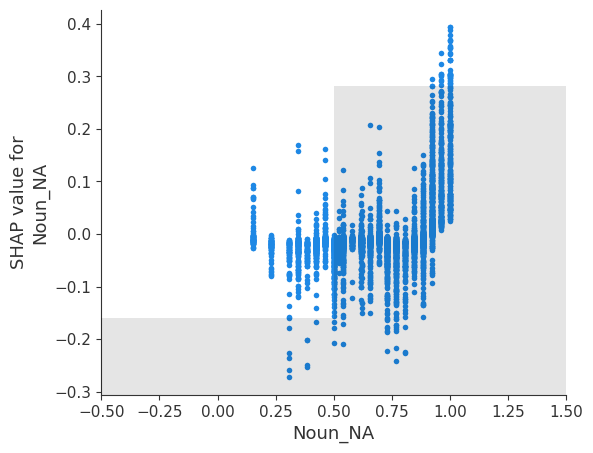

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Noun_NA"])

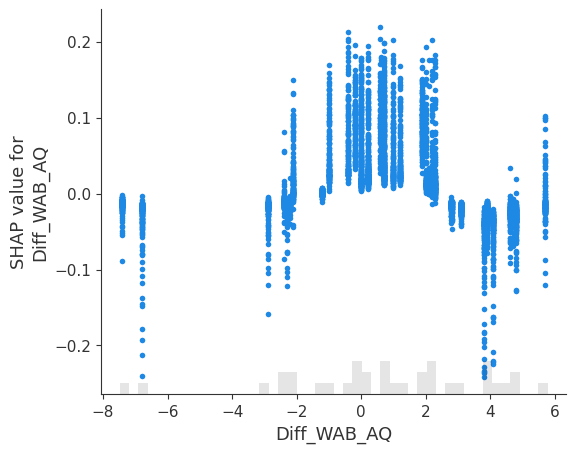

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Diff_WAB_AQ"])

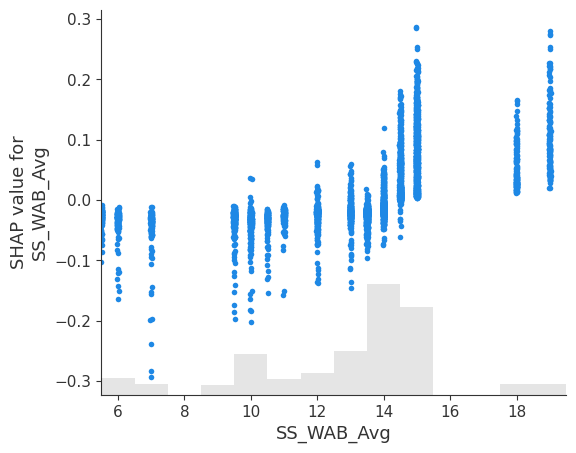

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"SS_WAB_Avg"])

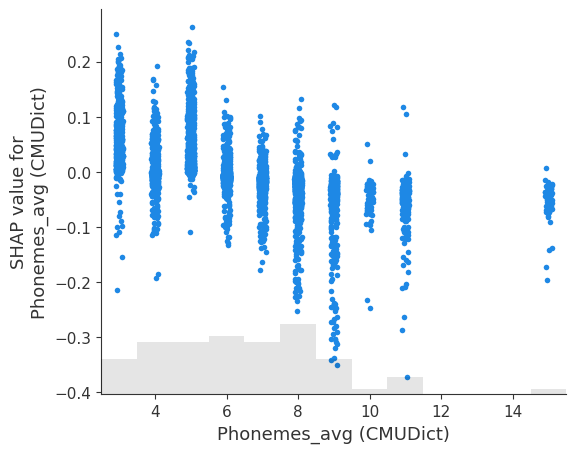

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Phonemes_avg (CMUDict)"])

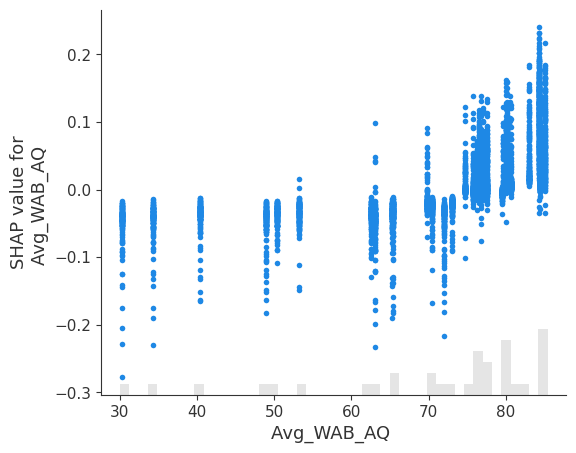

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Avg_WAB_AQ "])

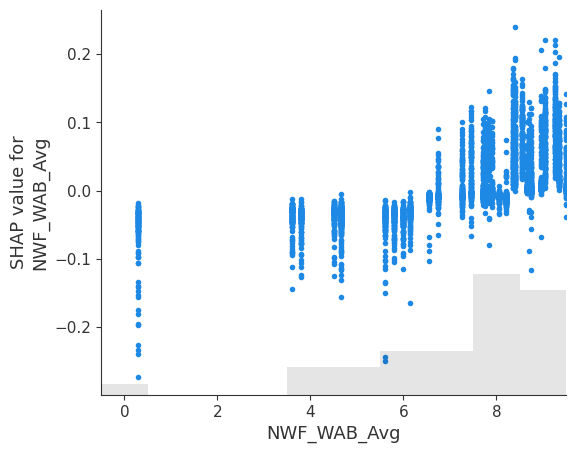

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"NWF_WAB_Avg"])

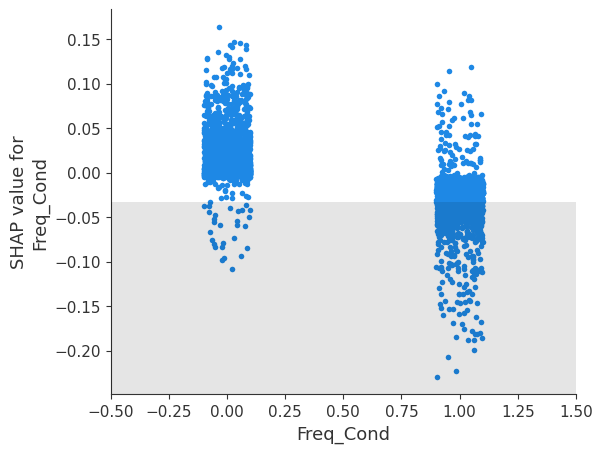

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Freq_Cond"])

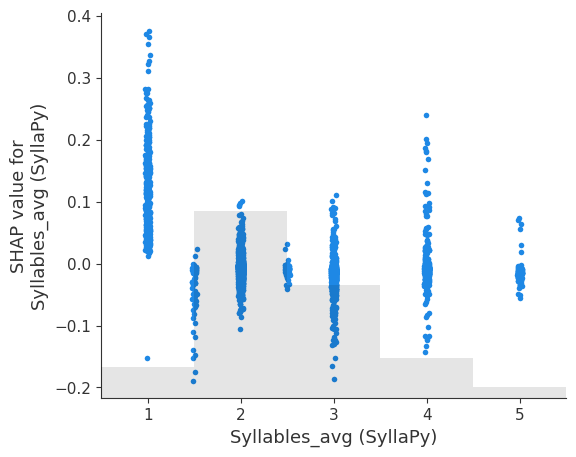

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Syllables_avg (SyllaPy)"])

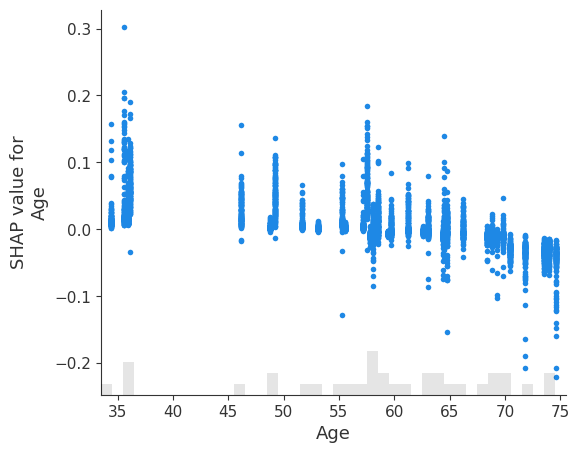

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Age"])

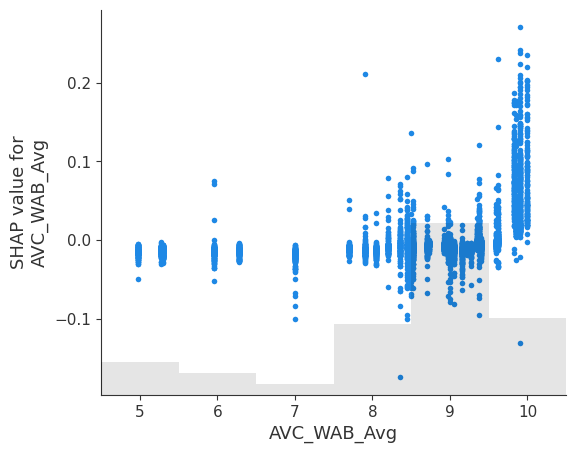

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"AVC_WAB_Avg"])

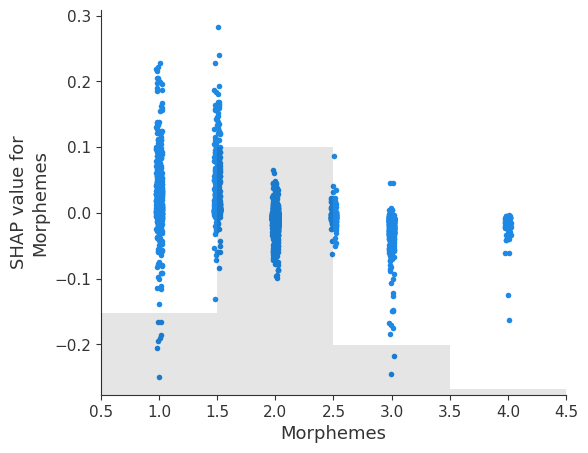

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Morphemes"])

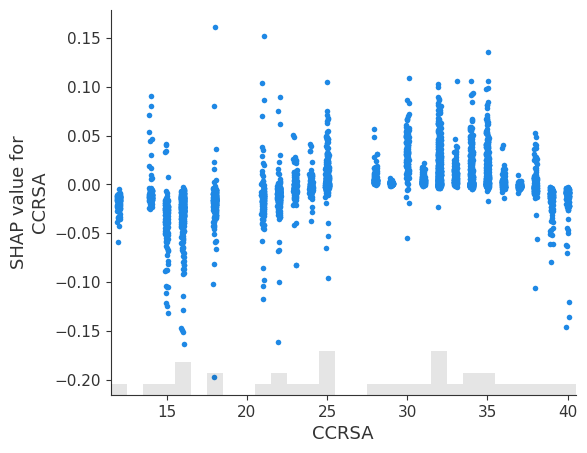

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"CCRSA"])

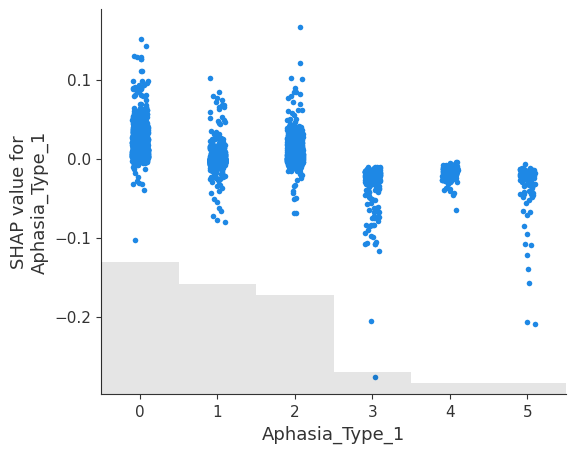

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Aphasia_Type_1"])

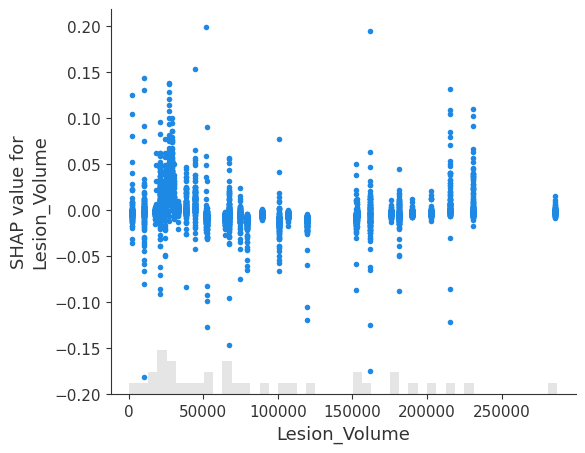

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Lesion_Volume"])

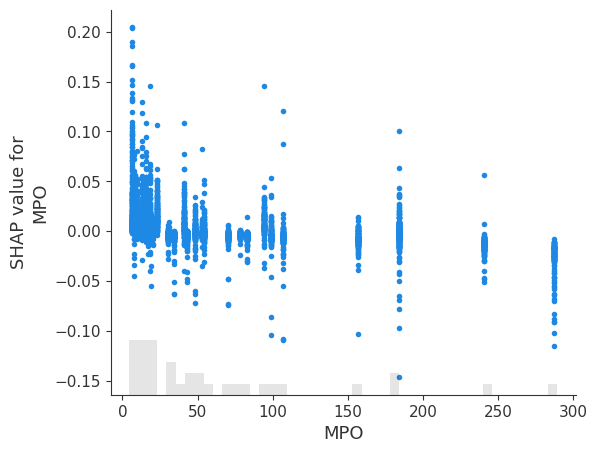

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"MPO"])

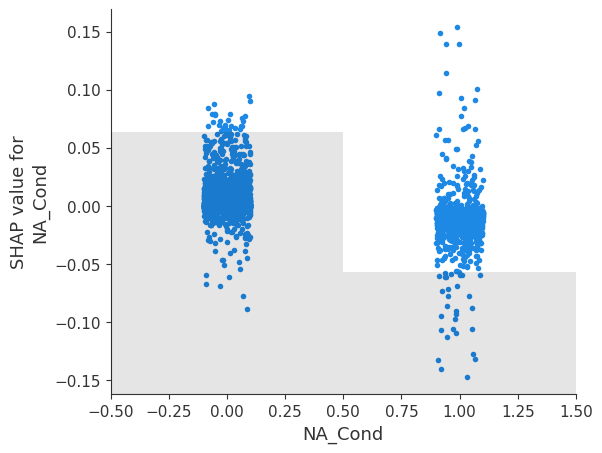

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"NA_Cond"])

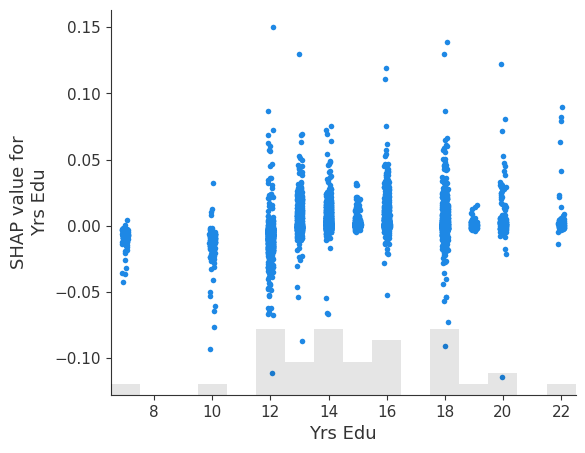

In [ ]:
shap.plots.scatter(rf2_shap_values[:,"Yrs Edu"])

# Make plots for All3 model

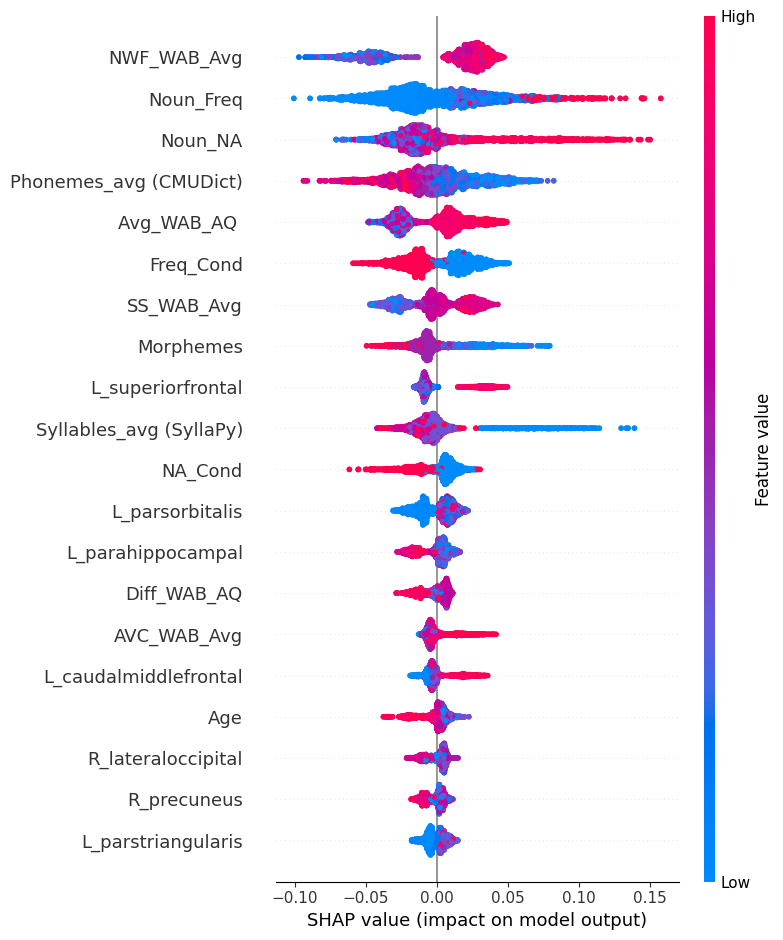

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_all3) # for correct answers


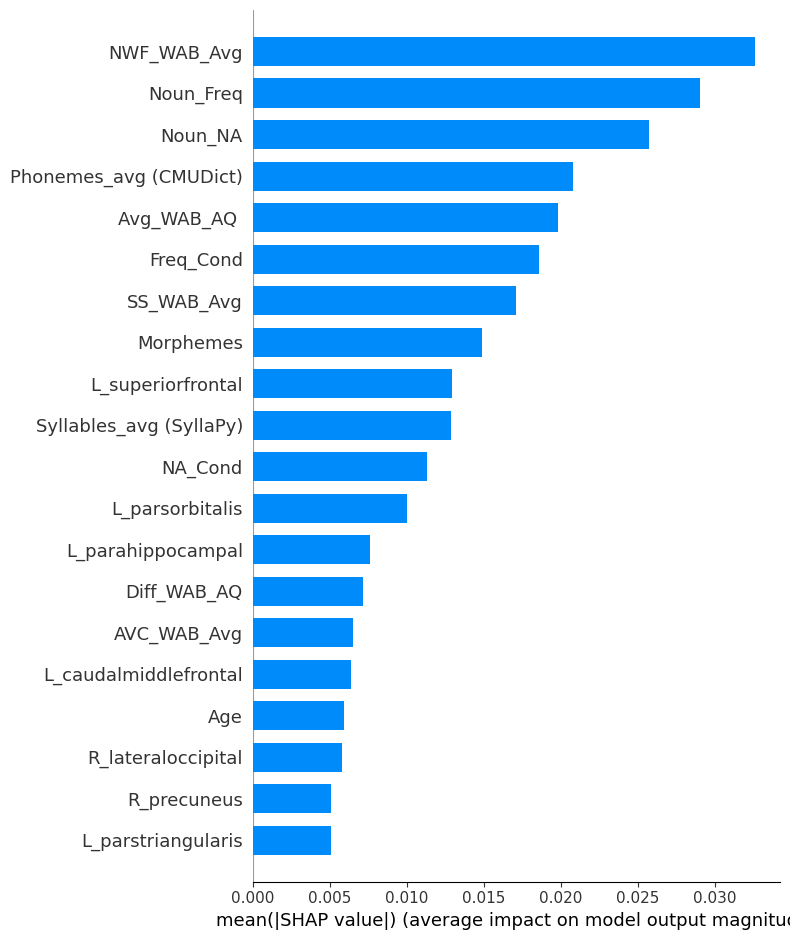

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_all3, plot_type="bar") # smoother look


try alt colors if needed

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Force%20Plot%20Colors.html

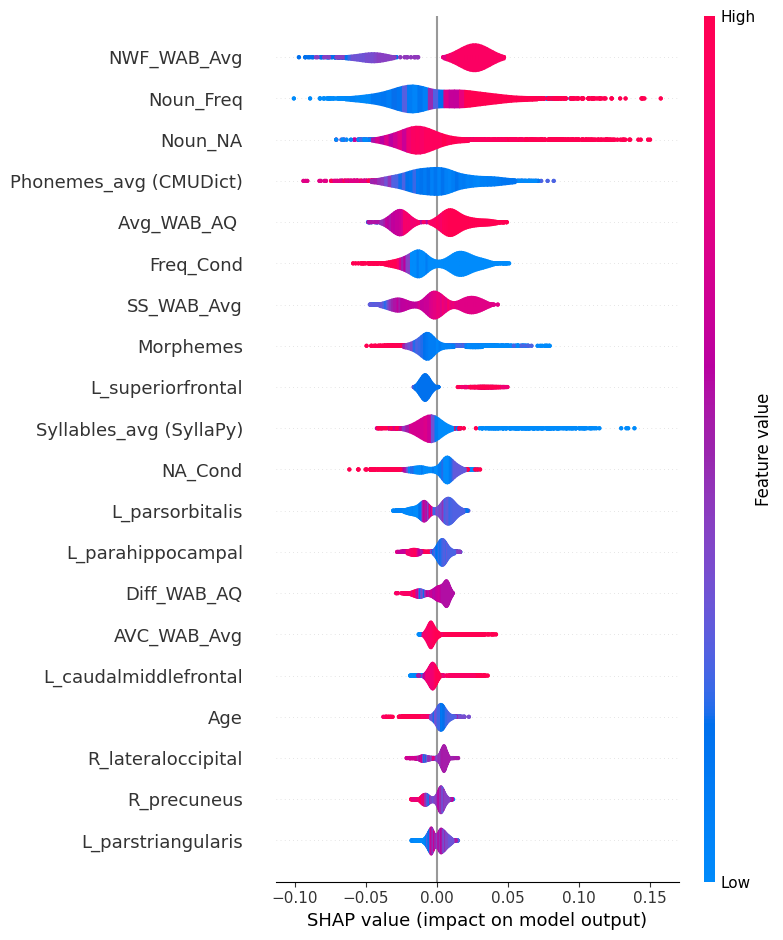

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_all3, plot_type="violin") # smoother look


In [ ]:
# Create a DataFrame with mean and standard deviation of SHAP values for each feature

mean_shap = np.mean(shap_values[:,:,1], axis=0)  # Mean SHAP values for class 1
std_shap = np.std(shap_values[:,:,1], axis=0)  # Standard deviation of SHAP values for class 1

# Create a DataFrame with feature names, mean SHAP values, and standard deviations
shap_df = pd.DataFrame({
    'Feature': X_all3.columns,
    'Mean SHAP': mean_shap,
    'Std SHAP': std_shap
})

# Sort by mean SHAP values for better visualization
shap_df = shap_df.sort_values(by='Mean SHAP', ascending=False)


In [ ]:
np.shape(shap_df)

(106, 3)

In [ ]:
shap_df

,Feature,Mean SHAP,Std SHAP
11,NWF_WAB_Avg,0.004618,0.035237
16,Freq_Cond,0.001141,0.020919
18,Noun_Freq,0.000737,0.036728
51,R_inferiortemporal,0.000611,0.001497
73,L_precentral,0.000609,0.005167
...,...,...,...
89,L_parahippocampal,-0.001039,0.009820
42,R_precuneus,-0.001144,0.006110
71,L_superiorfrontal,-0.001277,0.016467
96,L_transversetemporal,-0.001361,0.005594


In [ ]:
# save the shap_df
shap_df.to_csv('shap_df.csv', index=False)

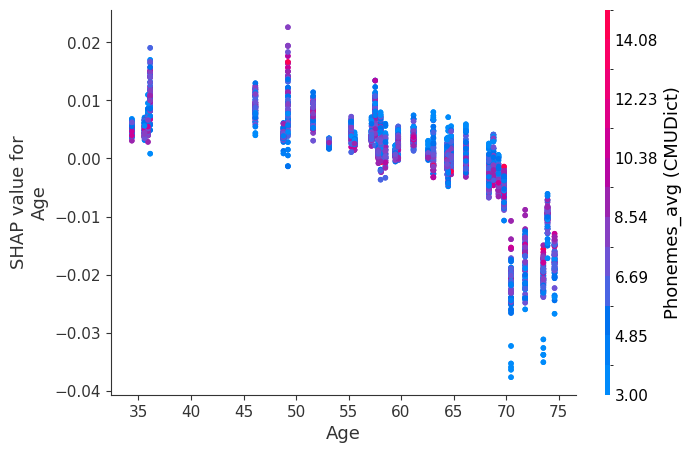

In [ ]:
shap.dependence_plot('Age', shap_values[...,1], X_all3)


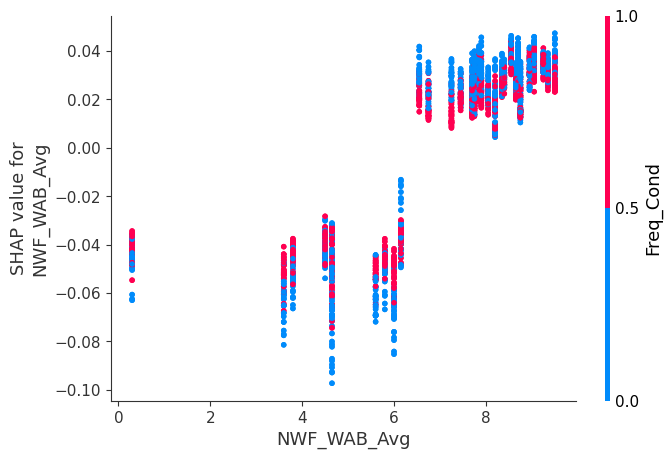

In [ ]:
shap.dependence_plot('NWF_WAB_Avg', shap_values[...,1], X_all3)


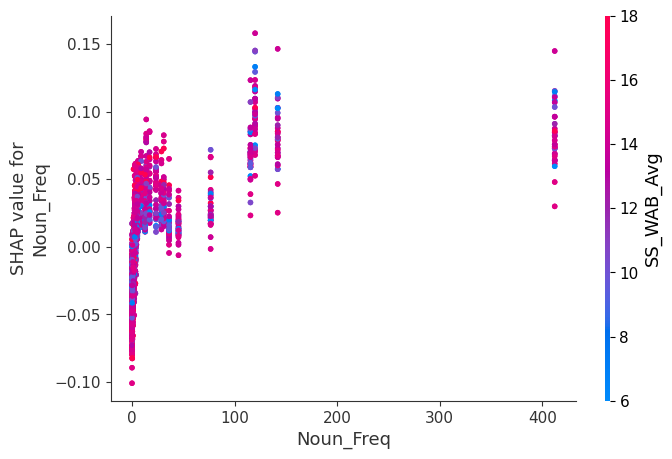

In [ ]:
shap.dependence_plot('Noun_Freq', shap_values[...,1], X_all3)


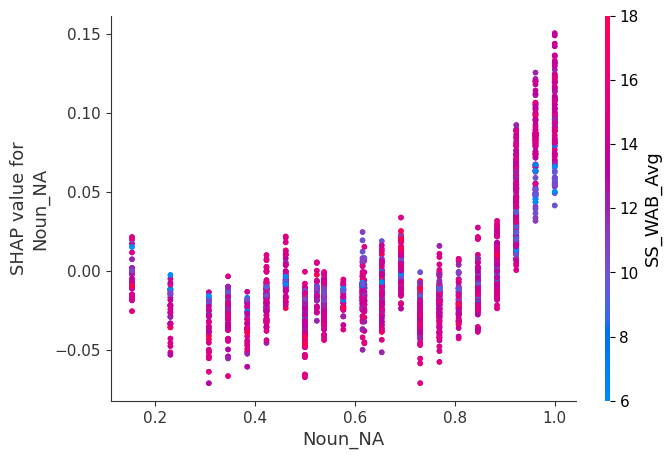

In [ ]:
shap.dependence_plot('Noun_NA', shap_values[...,1], X_all3)


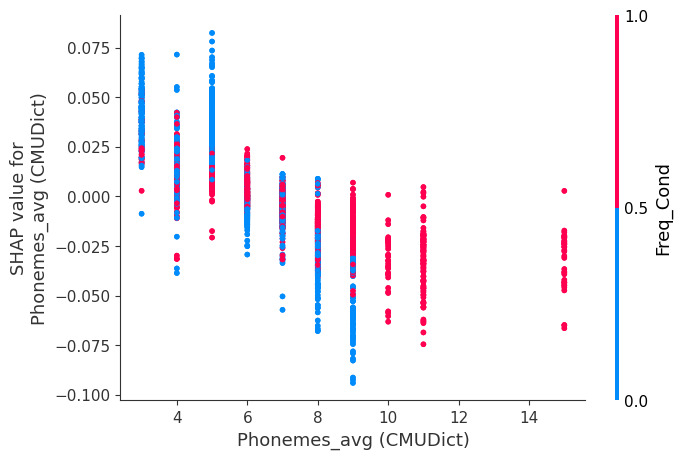

In [ ]:
shap.dependence_plot('Phonemes_avg (CMUDict)', shap_values[...,1], X_all3)


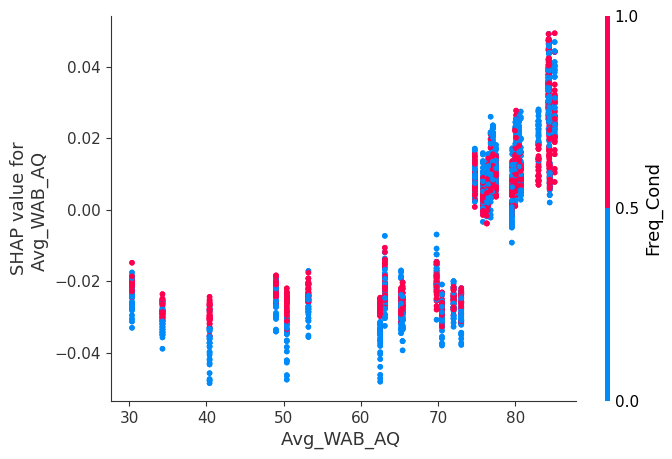

In [ ]:
shap.dependence_plot('Avg_WAB_AQ ', shap_values[...,1], X_all3)


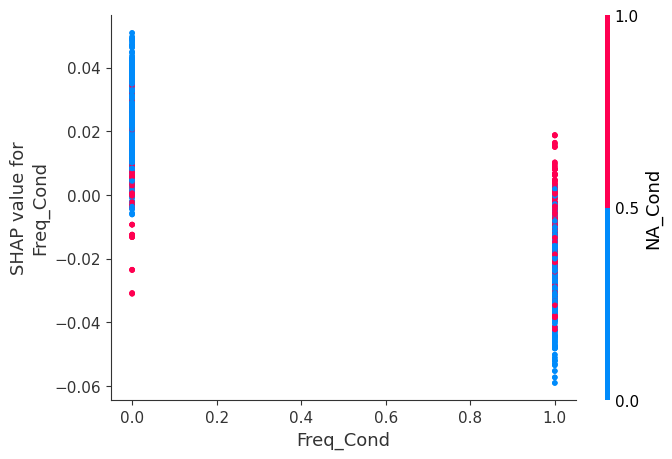

In [ ]:
shap.dependence_plot('Freq_Cond', shap_values[...,1], X_all3)


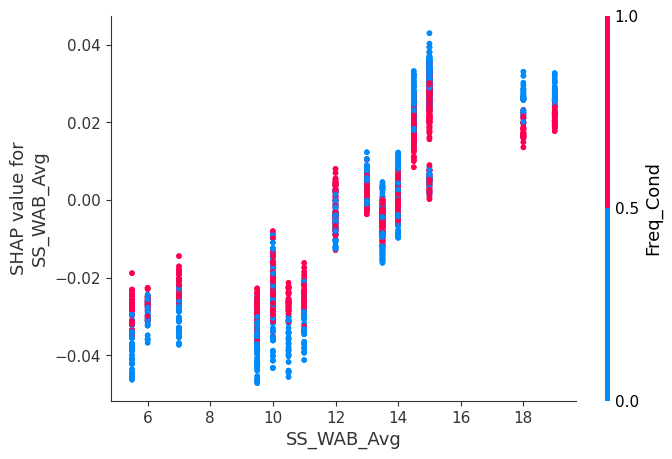

In [ ]:
shap.dependence_plot('SS_WAB_Avg', shap_values[...,1], X_all3)


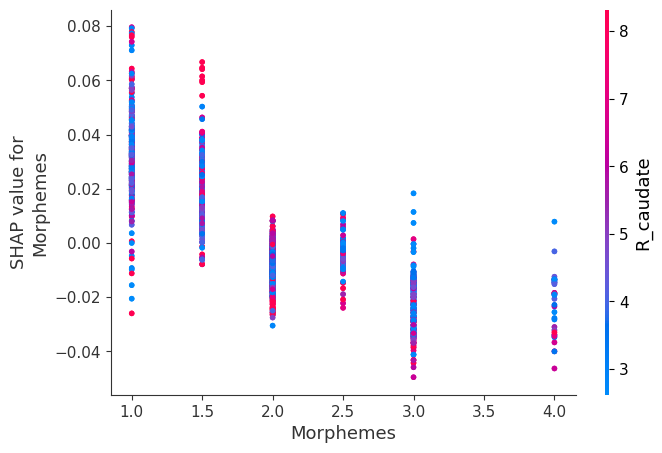

In [ ]:
shap.dependence_plot('Morphemes', shap_values[...,1], X_all3)


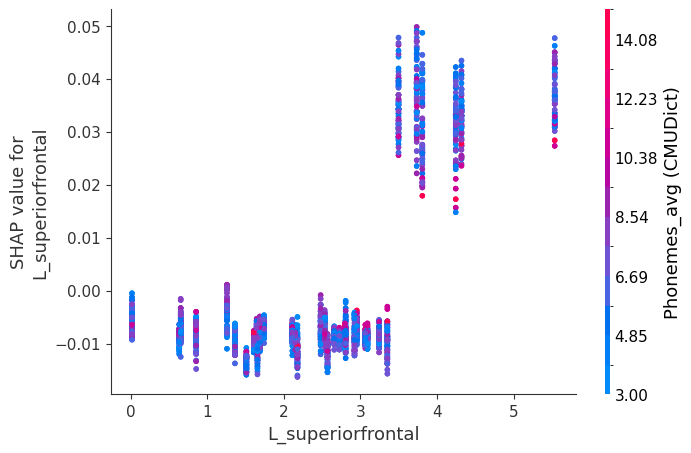

In [ ]:
shap.dependence_plot('L_superiorfrontal', shap_values[...,1], X_all3)


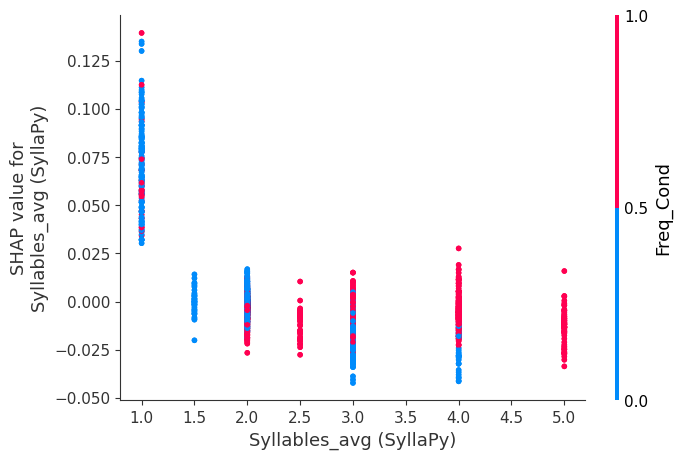

In [ ]:
shap.dependence_plot('Syllables_avg (SyllaPy)', shap_values[...,1], X_all3)


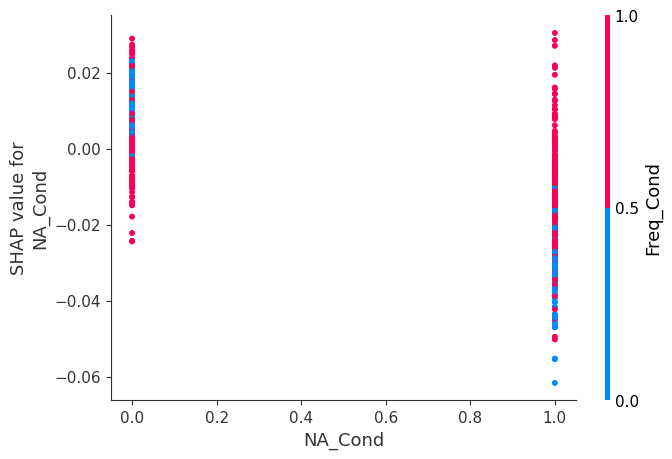

In [ ]:
shap.dependence_plot('NA_Cond', shap_values[...,1], X_all3)


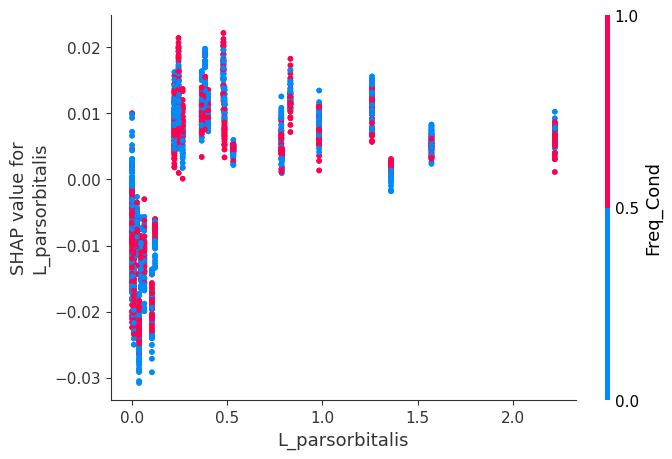

In [ ]:
shap.dependence_plot('L_parsorbitalis', shap_values[...,1], X_all3)


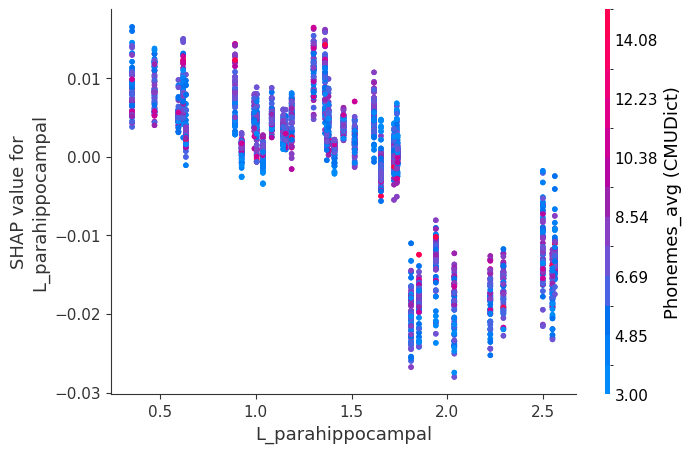

In [ ]:
shap.dependence_plot('L_parahippocampal', shap_values[...,1], X_all3)


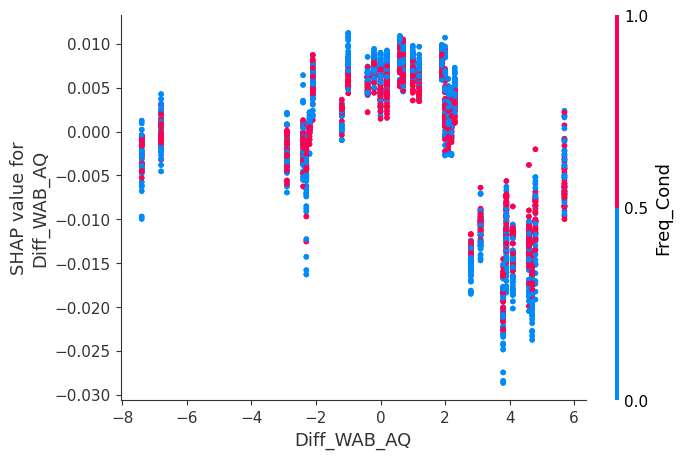

In [ ]:
shap.dependence_plot('Diff_WAB_AQ', shap_values[...,1], X_all3)
# re-plot as absolute value?

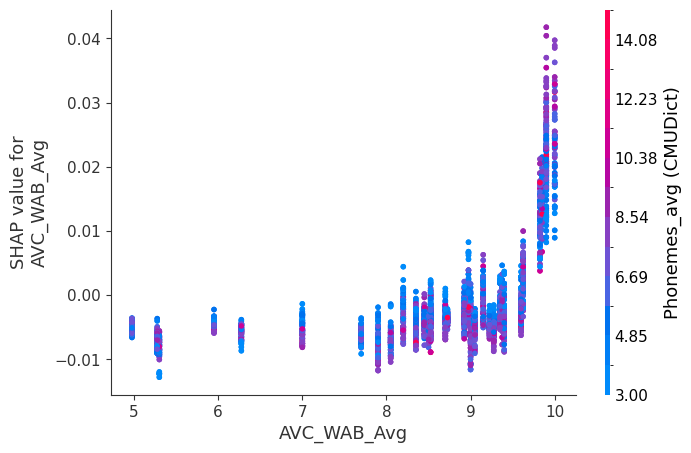

In [ ]:
shap.dependence_plot('AVC_WAB_Avg', shap_values[...,1], X_all3)


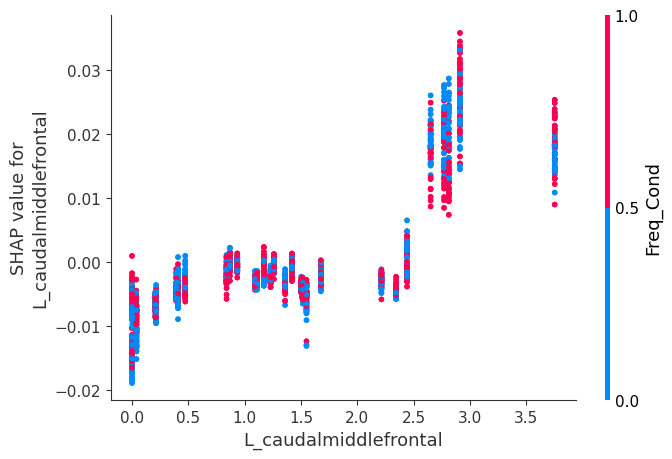

In [ ]:
shap.dependence_plot('L_caudalmiddlefrontal', shap_values[...,1], X_all3)


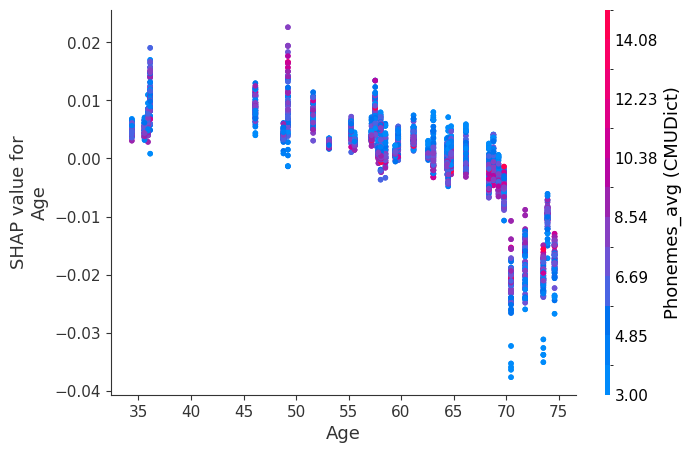

In [ ]:
shap.dependence_plot('Age', shap_values[...,1], X_all3)


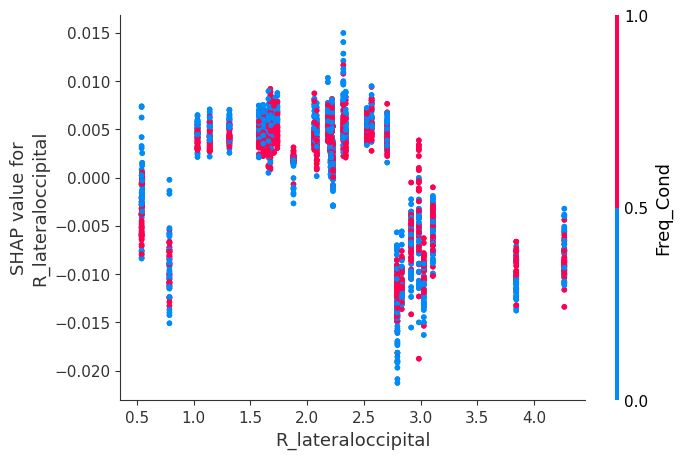

In [ ]:
shap.dependence_plot('R_lateraloccipital', shap_values[...,1], X_all3)


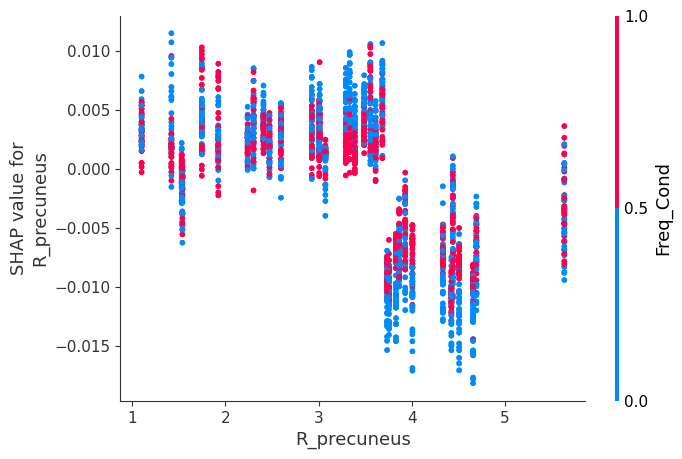

In [ ]:
shap.dependence_plot('R_precuneus', shap_values[...,1], X_all3)


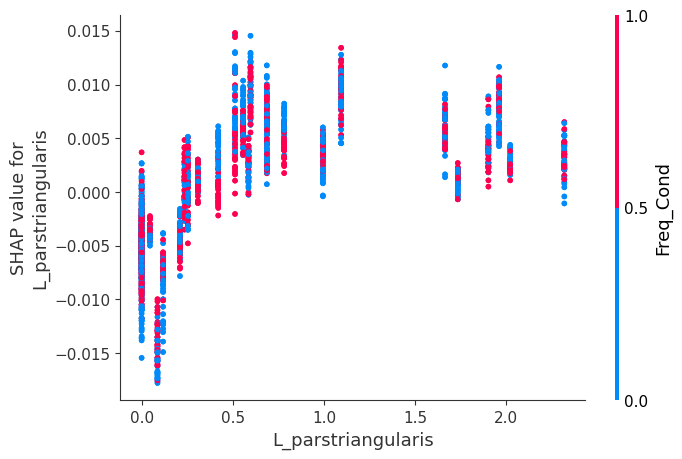

In [ ]:
shap.dependence_plot('L_parstriangularis', shap_values[...,1], X_all3)


##Single trial explainer? Or for subsets?

In [ ]:
# Grouped plots - try this later

aphasia_type = (
    X['Aphasia_Type']
    .apply(lambda aphasia_type: 'Anomic' if aphasia_type == 0 else 'Brocas' if aphasia_type == 1 else 'Conduction' if aphasia_type == 2 else 'Wernickes' if aphasia_type == 3)
    .values
)

shap.plots.bar(shap_values.cohorts(sex).abs.mean(axis=0))

## Force plot from initjs - only if reviewers ask